In [34]:
#import Library dan package yang dibutuhkan

import numpy as np #untuk perhitungan saintifik
import matplotlib.pyplot as plt #untuk plotting
from sklearn.linear_model import LinearRegression #import Library LinearRegression dari scikit-Learn

In [35]:
#buat data

penjualan = np.array([6,5,5,4,4,3,2,2,2,1])
harga = np.array([16000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

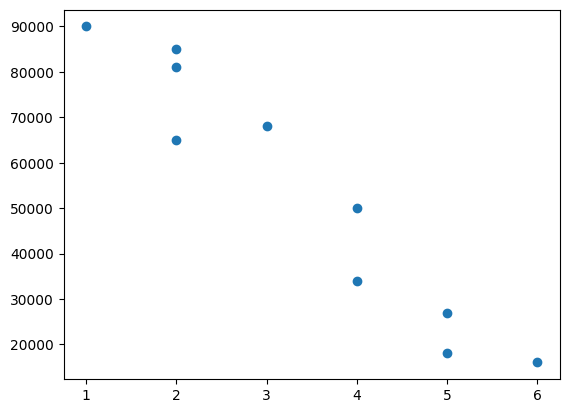

In [36]:
#buat plot
%matplotlib inline
plt.scatter (penjualan, harga)

In [37]:
#buat permodelan regresi
penjualan = penjualan.reshape (-1,1) #Tukar baris dan kolom variabel ini, agar bisa dikalikan dalam operasi matriks

linreg = LinearRegression()
linreg.fit(penjualan, harga)


LinearRegression()

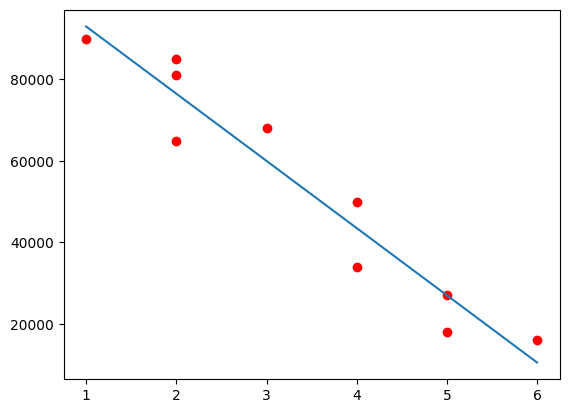

In [38]:
#plot hasil regresi

plt.scatter(penjualan, harga, color='red')
plt.plot(penjualan, linreg.predict(penjualan))

In [39]:
import pandas as pd

df = pd.read_csv("C:/Users/Ade ira/OneDrive/Documents/Perkuliahan/Semester 7/Machine Learning/Praktikum 1/Bahan data/FuelConsumptionCO2.csv") #baca data

#melihat 5 baris pertama data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [40]:
cdf = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


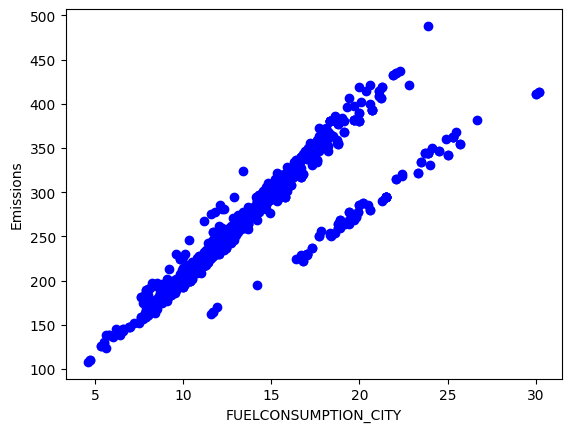

In [41]:
#Plot hubungannya

import matplotlib.pyplot as plt

plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emissions")
plt.show()

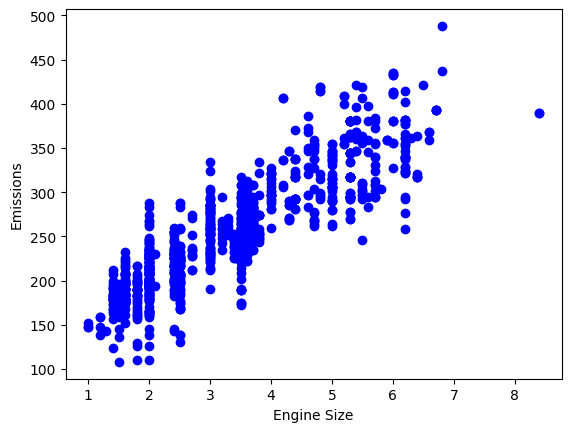

In [42]:
#Plot hubungannya

import matplotlib.pyplot as plt

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

In [43]:
#membagi data
import numpy as np

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf [~msk]

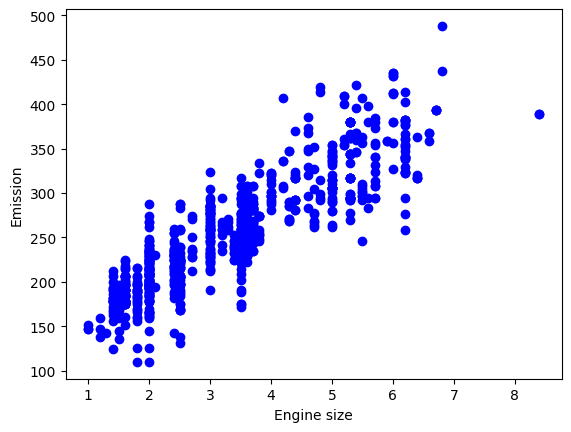

In [44]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression

#Membuat model regresi

regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

#koefisien model
print ('Coefficient:', regr.coef_)
print ('Intercept:', regr.intercept_)

Coefficient: [[38.71558683]]
Intercept: [125.96338746]


Text(0, 0.5, 'Emission')

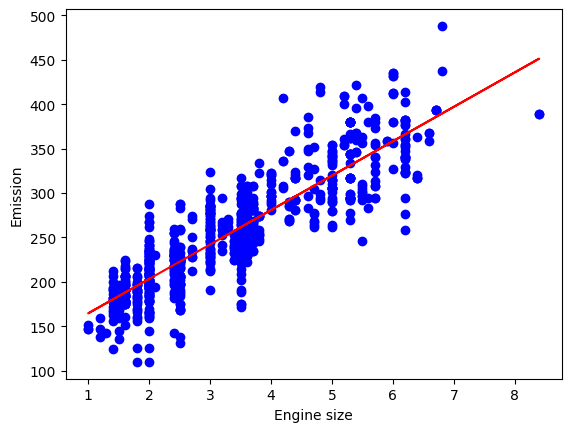

In [46]:
#Plot hasil regresi
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [48]:
# Menghitung error
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Residual sum of squares (RSS): %.2f" % np.mean((test_y - test_y_)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 24.51
Residual sum of squares (RSS): 1116.90
R2-score: 0.74
